# **Documentação**

**Aplicação de Algitmos de Machine Learning para Predição da Temperatura Interna ao Final da Corrida de 10km**

* Este projeto se dedica à aplicação de modelos de machine learning para prever a temperatura interna ao término de uma corrida autocontrolada de 10km. 

* A base de dados utilizada neste trabalho é proveniente do artigo de [Andrade et al. (2023)](https://pmc.ncbi.nlm.nih.gov/articles/PMC10988464/), com os dados brutos disponíveis pelos autores diretamente em https://doi.org/10.6084/m9.figshare.21508239.

* Previamente à modelagem, a base de dados foi submetida a um pré-processamento que incluiu a remoção de variáveis não utilizada aos modelos, a alteração da estrutura de dados das variáveis para formatos mais adequados, a eliminação de caracteres inválidos e a substituição de vírgulas por pontos para padronização numérica. 
Detalhes sobre estas transformações estão documentados no notebook **pre-processamento.ipynb** , localizado em **/home/lafise/Desktop/Samuel/leticiaag/pre-processamento.ipynb**. A partir dos dados pré-processados, foram geradas três bases de dados distintas, cada uma configurada para replicar os modelos de variáveis propostos pelos autores originais: Base de Dados 1 (10 variáveis), a Base de Dados 2 (8 variáveis) e a Base de Dados 3 (5 variáveis).

* O objetivo primário deste trabalho é avaliar a performance e otimização dos algoritmos de **Decision Tree, Random Forest, XGBoost e LASSO Regression** sobre as três bases de dados.

* No código abaixo, especificamente, foi realizada a modelagem dos quatro algoritmos de machine learning sobre a **Base de Dados 1**.

* **Variaveis preditoras** - WBGT, Running speed, Initial core, Body mass, Tcore-Tskin, Tskin mean, Sweat rate, VO2max, HR, ΔBM%

* **Variavel predita** - EndTcore

# Importando bibliotecas

## Geral

In [1]:
import pandas as pd #manipulacao de dados
import numpy as np #manipulacao de dados
import seaborn as sns #criacao de graficos
import matplotlib.pyplot as plt #criacao de graficos
from sklearn.metrics import mean_squared_error, r2_score #metricas de avaliacao dos algoritmos 
from sklearn.model_selection import train_test_split, GridSearchCV #amostragem e manipulacao de hiperparametros

## Decison tree

In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree #modelo de decision tree e grafico de arvore

## Random Forest

In [3]:
from sklearn.ensemble import RandomForestRegressor #modelo de random forest

## XGBoost

In [4]:
pip install xgboost #instalacao da biblioteca do algoritmo de xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
import xgboost as xgb #modelo de xgboos

## Regressão de LASSO

In [6]:
from sklearn.linear_model import Lasso # modelo de lasso
from sklearn.preprocessing import StandardScaler # Importado StandardScaler
from sklearn.pipeline import Pipeline # Importado Pipeline

# Importando base de dados

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/leprogramar/projeto1-doc/refs/heads/main/dados_modelo_1.csv") # base de dados usada em Decision tree
df2 = pd.read_csv("https://raw.githubusercontent.com/leprogramar/projeto1-doc/refs/heads/main/dados_modelo_1.csv") # base de dados usada em Random Forest
df3 = pd.read_csv("https://raw.githubusercontent.com/leprogramar/projeto1-doc/refs/heads/main/dados_modelo_1.csv") # base de dados usada em XGBoost
df4 = pd.read_csv("https://raw.githubusercontent.com/leprogramar/projeto1-doc/refs/heads/main/dados_modelo_1.csv") # base de dados usada em Lasso Regression

In [8]:
df.head() #vendo as 5 primeiras linhas do data frame

,EndTCORE_C,WBGT_C,Speed_kmh1,Initial_TCORE_C,Body_mass_kg,TCORE__TSKIN_C,Mean_TSKIN_C,Sweat_rate_Lh1,VO2MAX_mLkg1min1,Heart_rate_bpm,Delta_mass_
0,40.75,29.71,10.1,37.27,67.00,3.55,35.48,1.54,63.3,178,2.30
1,39.55,29.85,9.7,36.06,86.78,3.34,34.51,1.14,54.7,153,1.34
2,38.90,29.77,9.2,36.46,71.30,3.33,34.42,1.46,65.2,135,2.22
3,39.72,29.88,9.9,36.58,64.80,2.75,35.26,1.01,67.0,137,1.54
4,39.65,30.18,9.7,36.88,71.50,4.18,33.95,1.55,60.9,152,2.24


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EndTCORE_C        75 non-null     float64
 1   WBGT_C            75 non-null     float64
 2   Speed_kmh1        75 non-null     float64
 3   Initial_TCORE_C   75 non-null     float64
 4   Body_mass_kg      75 non-null     float64
 5   TCORE__TSKIN_C    75 non-null     float64
 6   Mean_TSKIN_C      75 non-null     float64
 7   Sweat_rate_Lh1    75 non-null     float64
 8   VO2MAX_mLkg1min1  75 non-null     float64
 9   Heart_rate_bpm    75 non-null     int64  
 10  Delta_mass_       75 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 6.6 KB


# **DECISION TREE**

## Pré processamento - decision tree

In [10]:
X1 = df.drop("EndTCORE_C", axis=1) #separando as variaveis preditoras
y1 = df["EndTCORE_C"] #separando a variavel predita

In [11]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42) #separando a base de dados de treino(80%) e teste(20%).
#a separacao em 80/20 foi escolhida porque a quantidade de dados para treinar o modelo quando a escolhido 70/30 ou 80/10/10 nao disponibilizava dados o suficiente 
#para a criacao do modelo, levando ao underfitting. para mitigar o overfitting comb a distribuicao 80/20, foi usado a tecnica de amostragem K-fold.

In [12]:
#otimizacao de hiperparametros
param_grid = {
    'max_depth': [5, 10, 15, 18, 20], #profundidade máxima da arvore
    'min_samples_leaf': [3, 5, 9, 10], #minimo de amostra por folha
    'min_samples_split': [3, 5, 8, 10], #minimo de amostras para dividir
    'ccp_alpha': [0.00, 0.02, 0.03] #regularizacao do custo de complexidade
}

In [13]:
dt_regressor_base = DecisionTreeRegressor(random_state=42) #criacao da instancia do modelo decision tree, utilizando random_state=42 para asegurar reprodutibilidade 

In [14]:
grid_search = GridSearchCV(estimator=dt_regressor_base, #algoritmo base
                           param_grid=param_grid, #hiperparametros
                           cv=5, #5 K-fold (validacao cruzada)
                           scoring='neg_mean_squared_error', #paramentros de escolha de melhor algoritmo
                           n_jobs=-1, # usa todos os nucleos de processamento disponiveis
                           verbose=1) #exibe de processamento

## Treinamento do modelo - Decision Tree

In [15]:
grid_search.fit(X_train1, y_train1) #treinando o modelos com a base de dados de treino

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.02, 0.03],
                         'max_depth': [5, 10, 15, 18, 20],
                         'min_samples_leaf': [3, 5, 9, 10],
                         'min_samples_split': [3, 5, 8, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [16]:
best_dt_regressor = grid_search.best_estimator_ #pegando os hiperparamentros usados no modelo gerado

In [17]:
print(best_dt_regressor)

DecisionTreeRegressor(ccp_alpha=0.02, max_depth=5, min_samples_leaf=3,
                      min_samples_split=3, random_state=42)


## Avaliando o modelo - Decison tree

**Dados treino**

In [18]:
mse_train = mean_squared_error(y_train1, best_dt_regressor.predict(X_train1)) #calculo de MSE
rmse_train = np.sqrt(mse_train) #calculo de RMSE
r2_train = r2_score(y_train1, best_dt_regressor.predict(X_train1)) #calculo de R2
mse_optimized = mean_squared_error(y_test1, best_dt_regressor.predict(X_test1)) #calculo de MSE
rmse_optimized = np.sqrt(mse_optimized) #calculo de RMSE 
r2_optimized = r2_score(y_test1, best_dt_regressor.predict(X_test1)) #calculo de R2
print('===========================================================')
print(f"--- Métricas de Avaliação do Modelo - Dados TREINO ---")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")
print('===========================================================')
print(f"--- Métricas de Avaliação do Modelo - Dados TESTE---")
print(f"Mean Squared Error (MSE): {mse_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized:.2f}")
print(f"R-squared (R²): {r2_optimized:.2f}")

--- Métricas de Avaliação do Modelo - Dados TREINO ---
Mean Squared Error (MSE): 0.12
Root Mean Squared Error (RMSE): 0.34
R-squared (R²): 0.56
--- Métricas de Avaliação do Modelo - Dados TESTE---
Mean Squared Error (MSE): 0.13
Root Mean Squared Error (RMSE): 0.36
R-squared (R²): 0.55


**Dados Teste**

## Estrutura da árvore

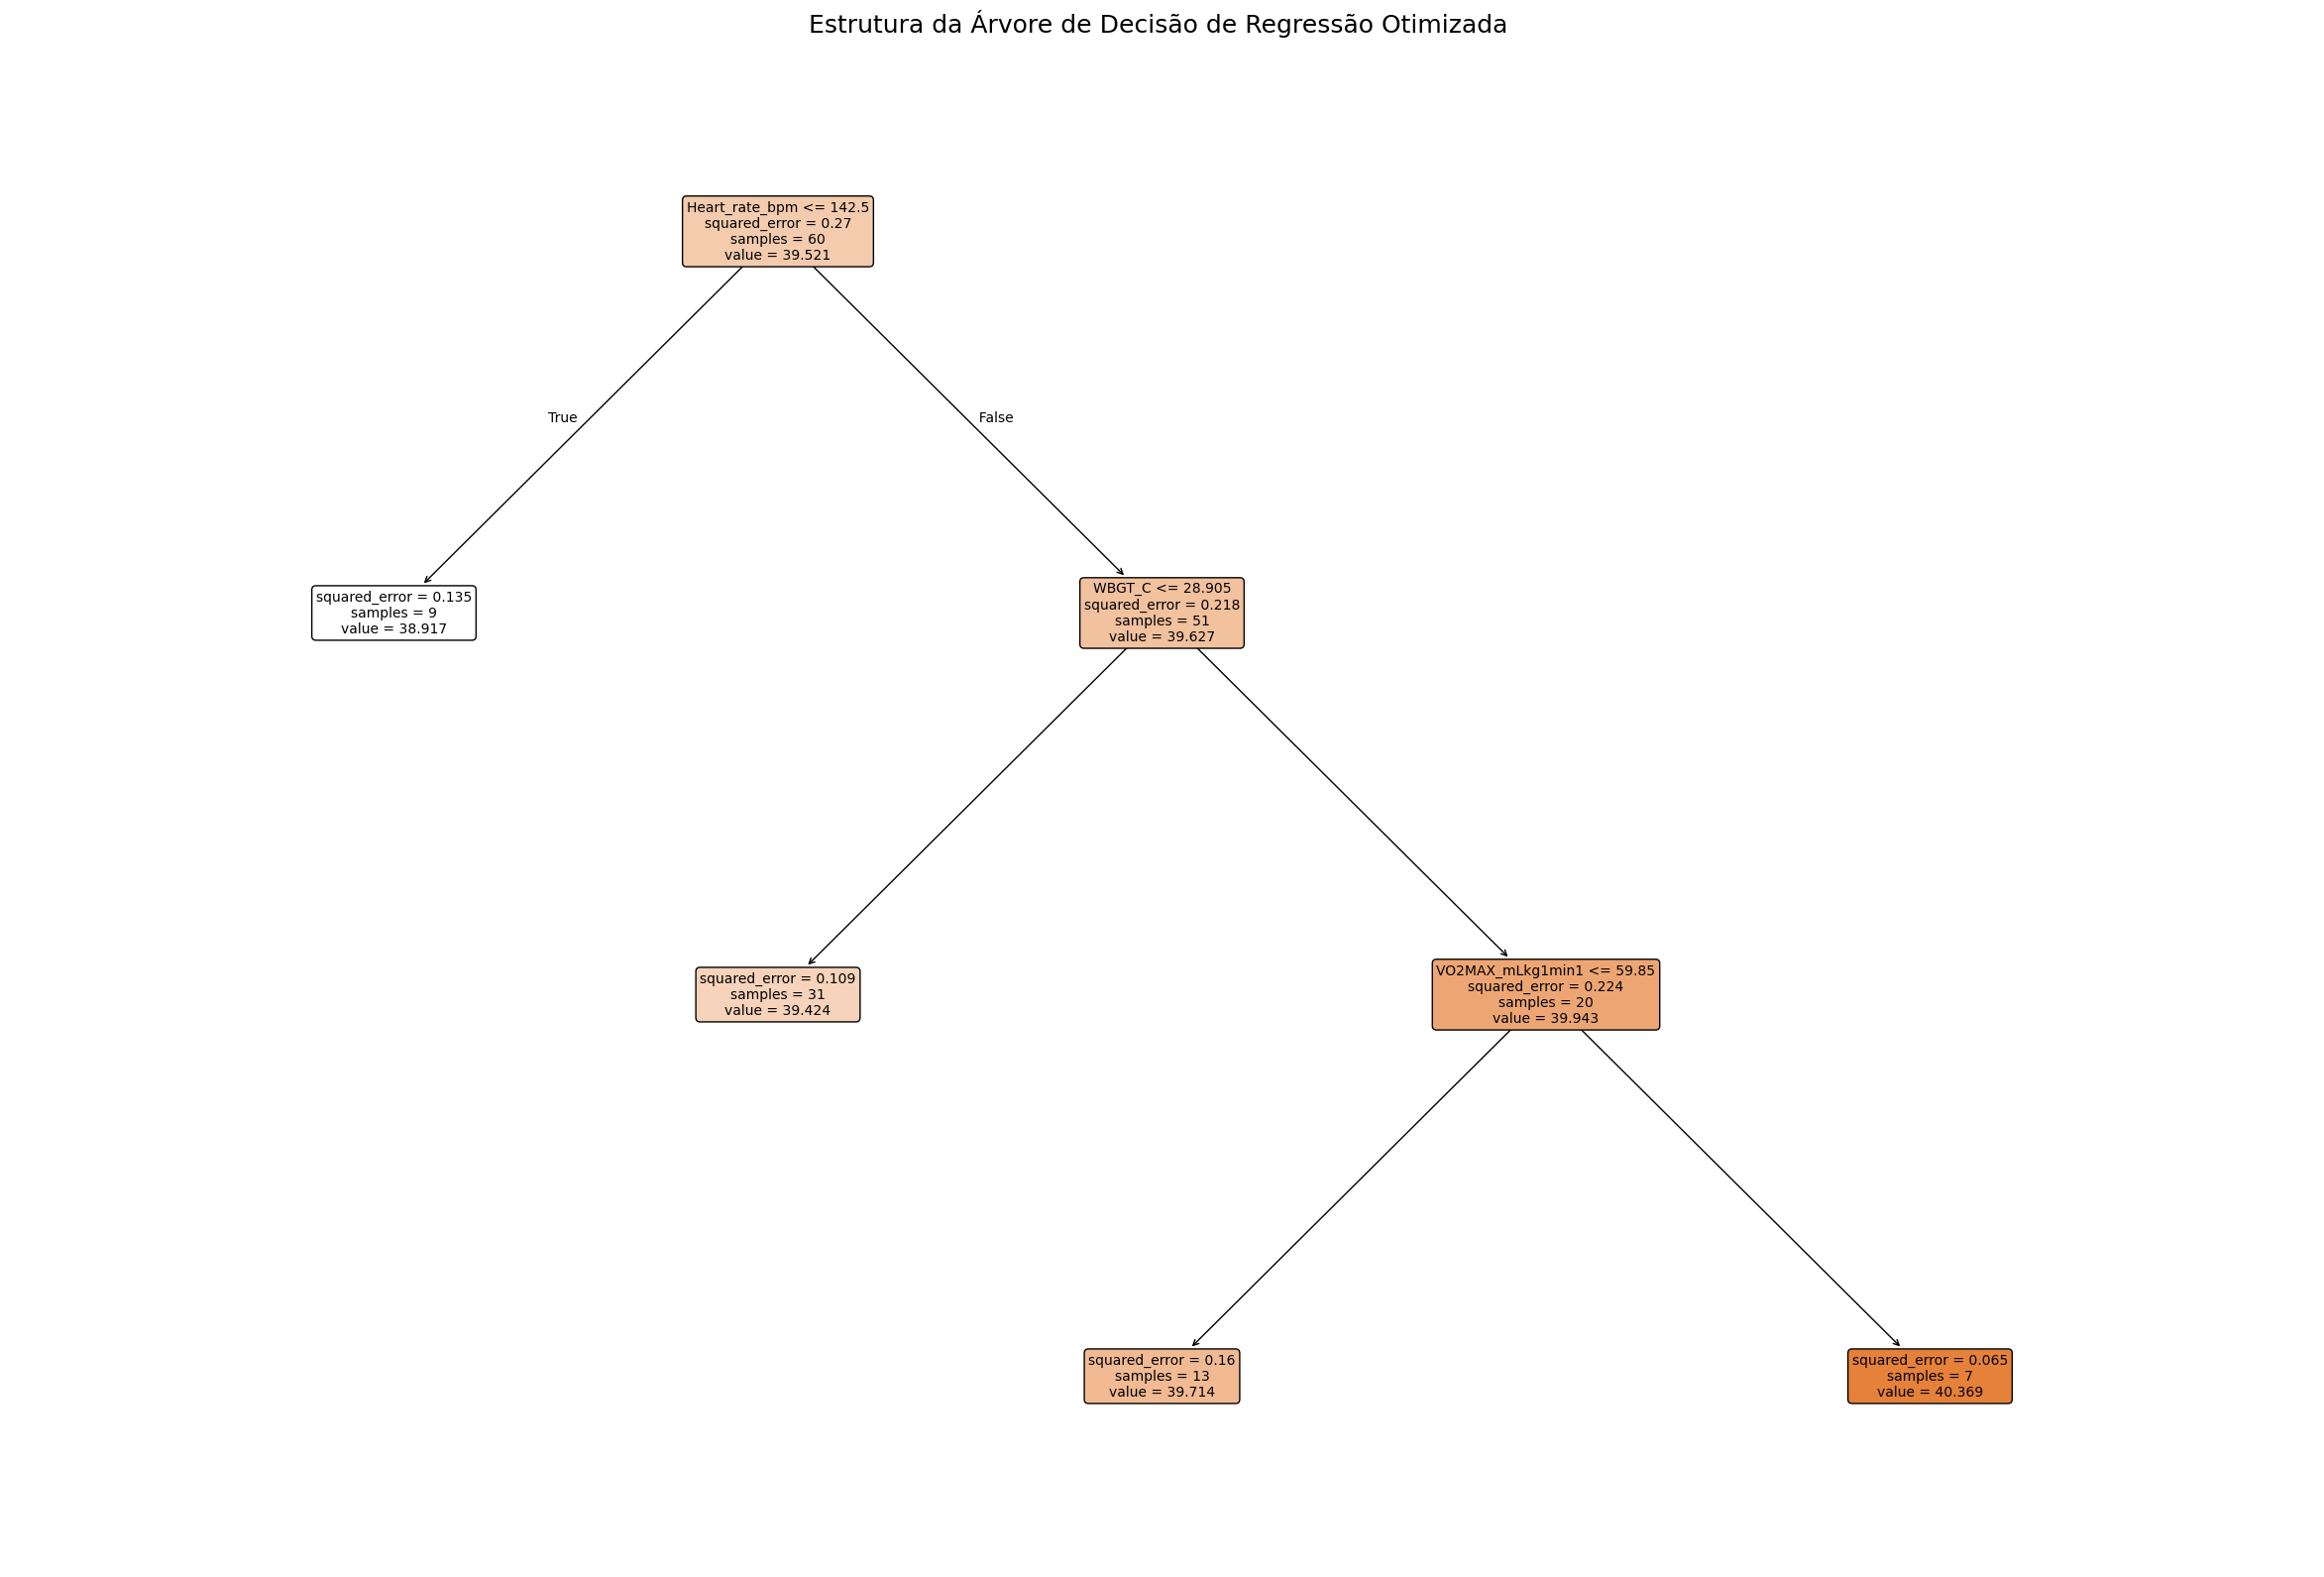

In [19]:
plt.figure(figsize=(30, 20)) #declaracao da figura
plot_tree(best_dt_regressor, feature_names=X1.columns.tolist(), filled=True, rounded=True, fontsize=10) #gerando o grafico
plt.title("Estrutura da Árvore de Decisão de Regressão Otimizada ", fontsize=18) #titulo
plt.show() #mostrando o grafico

### gráfico de grid

In [20]:
results = pd.DataFrame(grid_search.cv_results_)

In [21]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003066,0.000202,0.001541,0.000065,0.00,5,3,3,"{'ccp_alpha': 0.0, 'max_depth': 5, 'min_sample...",-0.585980,-0.309001,-0.202732,-0.166662,-0.116601,-0.276195,0.167276,54
1,0.003080,0.000232,0.001622,0.000066,0.00,5,3,5,"{'ccp_alpha': 0.0, 'max_depth': 5, 'min_sample...",-0.585980,-0.309001,-0.202732,-0.166662,-0.116601,-0.276195,0.167276,54
2,0.002934,0.000281,0.001607,0.000194,0.00,5,3,8,"{'ccp_alpha': 0.0, 'max_depth': 5, 'min_sample...",-0.597721,-0.322609,-0.235512,-0.172867,-0.125168,-0.290776,0.167100,96
3,0.003154,0.000511,0.001542,0.000094,0.00,5,3,10,"{'ccp_alpha': 0.0, 'max_depth': 5, 'min_sample...",-0.534283,-0.345244,-0.176816,-0.175088,-0.125168,-0.271320,0.151107,53
4,0.002843,0.000462,0.001442,0.000035,0.00,5,5,3,"{'ccp_alpha': 0.0, 'max_depth': 5, 'min_sample...",-0.511275,-0.302119,-0.166633,-0.243644,-0.231526,-0.291039,0.118230,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.002713,0.000650,0.001651,0.000550,0.03,20,9,10,"{'ccp_alpha': 0.03, 'max_depth': 20, 'min_samp...",-0.439290,-0.385818,-0.205364,-0.366955,-0.279694,-0.335424,0.082877,221
236,0.002842,0.000586,0.002008,0.001133,0.03,20,10,3,"{'ccp_alpha': 0.03, 'max_depth': 20, 'min_samp...",-0.439290,-0.231949,-0.232560,-0.366955,-0.279694,-0.310090,0.081200,141
237,0.002463,0.000425,0.001280,0.000041,0.03,20,10,5,"{'ccp_alpha': 0.03, 'max_depth': 20, 'min_samp...",-0.439290,-0.231949,-0.232560,-0.366955,-0.279694,-0.310090,0.081200,141
238,0.002555,0.000396,0.001318,0.000040,0.03,20,10,8,"{'ccp_alpha': 0.03, 'max_depth': 20, 'min_samp...",-0.439290,-0.231949,-0.232560,-0.366955,-0.279694,-0.310090,0.081200,141


In [22]:
results['mean_test_rmse'] = np.sqrt(-results['mean_test_score'])
results['std_test_rmse'] = np.sqrt(results['std_test_score'])

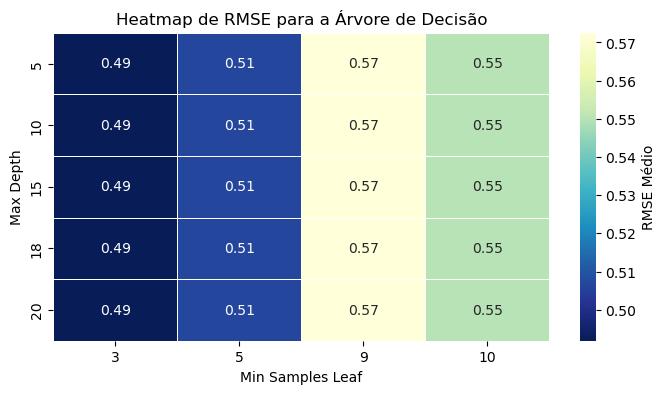

In [23]:
best_params = grid_search.best_params_
fixed_split = best_params['min_samples_split']
fixed_alpha = best_params['ccp_alpha']

# Filtra os resultados para os valores fixos
filtered_results = results[
    (results['param_min_samples_split'] == fixed_split) &
    (results['param_ccp_alpha'] == fixed_alpha)
]

# Cria uma tabela pivot para o heatmap
pivot_table = filtered_results.pivot_table(
    values='mean_test_rmse',
    index='param_max_depth',
    columns='param_min_samples_leaf'
)

# Plotando o heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu_r",
            linewidths=.5, cbar_kws={'label': 'RMSE Médio'})
plt.title(f'Heatmap de RMSE para a Árvore de Decisão')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Max Depth')
plt.show()

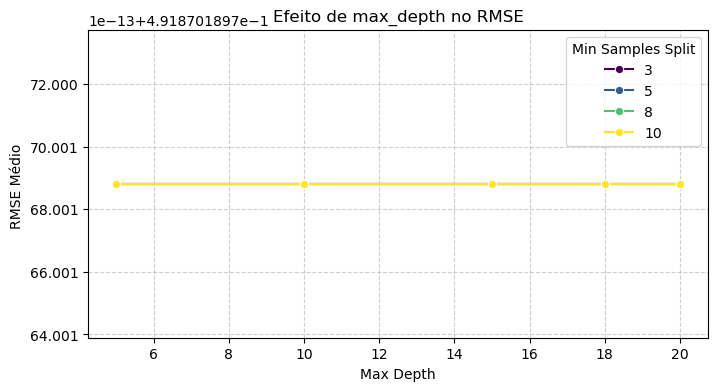

In [24]:
fixed_leaf = best_params['min_samples_leaf']
fixed_alpha = best_params['ccp_alpha']

# Filtra os resultados
filtered_results_line = results[
    (results['param_min_samples_leaf'] == fixed_leaf) &
    (results['param_ccp_alpha'] == fixed_alpha)
]

plt.figure(figsize=(8, 4))
sns.lineplot(
    data=filtered_results_line,
    x='param_max_depth',
    y='mean_test_rmse',
    hue='param_min_samples_split',
    marker='o',
    palette='viridis'
)
plt.title(f'Efeito de max_depth no RMSE')
plt.xlabel('Max Depth')
plt.ylabel('RMSE Médio ')
plt.legend(title='Min Samples Split')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

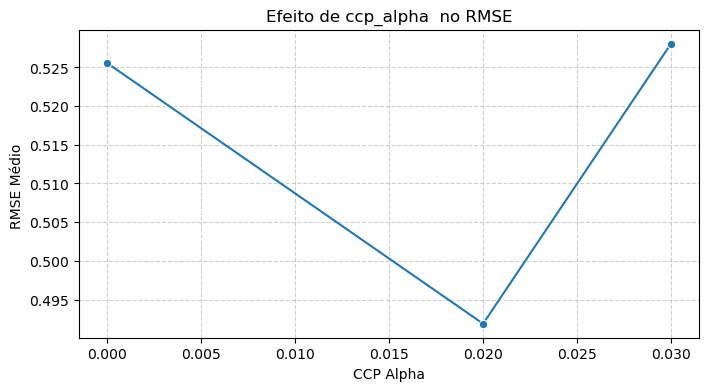

In [25]:

fixed_depth = best_params['max_depth']
fixed_leaf = best_params['min_samples_leaf']
fixed_split = best_params['min_samples_split']

# Filtra os resultados
filtered_results_alpha = results[
    (results['param_max_depth'] == fixed_depth) &
    (results['param_min_samples_leaf'] == fixed_leaf) &
    (results['param_min_samples_split'] == fixed_split)
]

plt.figure(figsize=(8, 4))
sns.lineplot(
    data=filtered_results_alpha,
    x='param_ccp_alpha',
    y='mean_test_rmse',
    marker='o'
)
plt.title(f'Efeito de ccp_alpha  no RMSE')
plt.xlabel('CCP Alpha')
plt.ylabel('RMSE Médio ')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# **RANDOM FOREST**

## Pré-processamento - Random forest

In [26]:
X2 = df2.drop("EndTCORE_C", axis=1) #separando as variaveis preditoras
y2 = df2["EndTCORE_C"] #separando a variavel predita

In [27]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)#separando a base de dados de treino(80%) e teste(20%)

In [28]:
#otimizacao de hiperparametros
param_grid_rf = {
    'n_estimators': [100, 150, 200], # numero de arvores na floresta
    'max_depth': [3, 4, 5, 8], # profundidade máxima de cada arvore
    'min_samples_leaf': [ 10, 8, 12], # minimo de amostras em um nó folha
    'min_samples_split': [ 10, 8, 12], # minimo de amostras para dividir um nó
    'max_features': ['log2'], # numero de features a considerar em cada split
    'ccp_alpha': [0.00, 0.001, 0.002, 0.003] #custo de complexidade
}

In [29]:
rf_regressor_base = RandomForestRegressor(random_state=42) #criacao da instancia do modelo random forest, utilizando random_state=42 para asegurar reprodutibilidade 

In [30]:
grid_search_rf = GridSearchCV(estimator=rf_regressor_base, #algoritmo base
                              param_grid=param_grid_rf, #hiperparametros
                              cv=5, #5 K-fold (validacao cruzada)
                              scoring='neg_mean_squared_error', # otimiza para o menor MSE
                              n_jobs=-1, # usa todos os nucleos disponiveis
                              verbose=1) # exibe o progresso

## Treinamento do modelo - Rondom forest

In [31]:
grid_search_rf.fit(X_train2, y_train2) #treinando o modelo com base nos dados de treino

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.001, 0.002, 0.003],
                         'max_depth': [3, 4, 5, 8], 'max_features': ['log2'],
                         'min_samples_leaf': [10, 8, 12],
                         'min_samples_split': [10, 8, 12],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [32]:
best_params_rf = grid_search_rf.best_params_ 
best_rf_regressor = grid_search_rf.best_estimator_

In [33]:
y_pred_rf_optimized = best_rf_regressor.predict(X_test2)
y_pred_rf_train = best_rf_regressor.predict(X_train2)

## Avaliando o modelo - Random forest

**Dados de treino**

In [34]:
mse_rf_train = mean_squared_error(y_train2, y_pred_rf_train) #calculando MSE
rmse_rf_train = np.sqrt(mse_rf_train) #calculando RMSE
r2_rf_train = r2_score(y_train2, y_pred_rf_train) #calculando R2

In [35]:
print(f"\n--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TREINO) ---")
print(f"Mean Squared Error (MSE): {mse_rf_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_train:.2f}")
print(f"R-squared (R²): {r2_rf_train:.2f}")


--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TREINO) ---
Mean Squared Error (MSE): 0.16
Root Mean Squared Error (RMSE): 0.40
R-squared (R²): 0.42


**Dados de teste**

In [36]:
mse_rf_optimized = mean_squared_error(y_test2, y_pred_rf_optimized)
rmse_rf_optimized = np.sqrt(mse_rf_optimized)
r2_rf_optimized = r2_score(y_test2, y_pred_rf_optimized)

In [37]:
print(f"\n--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TESTE) ---")
print(f"Mean Squared Error (MSE): {mse_rf_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_optimized:.2f}")
print(f"R-squared (R²): {r2_rf_optimized:.2f}")


--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TESTE) ---
Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
R-squared (R²): 0.41


## Gráficos

In [38]:
#estraindo a importancia das variaveis do modelo treinado 
importances_rf = (best_rf_regressor.feature_importances_)*100
feature_names_rf = X2.columns

In [39]:
# Criando DataFrame para facilitar a visualização
rf_importance_df = pd.DataFrame({
    'Feature': feature_names_rf,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

In [40]:
rf_importance_df.round(2)

,Feature,Importance
8,Heart_rate_bpm,21.10
0,WBGT_C,20.03
2,Initial_TCORE_C,17.16
7,VO2MAX_mLkg1min1,11.61
5,Mean_TSKIN_C,10.85
1,Speed_kmh1,4.97
9,Delta_mass_,4.46
6,Sweat_rate_Lh1,3.34
3,Body_mass_kg,3.30
4,TCORE__TSKIN_C,3.17


In [41]:
mapa_de_nomes = {
    'Heart_rate_bpm': 'Heart rate',
    'WBGT_C': 'WBGT',
    'Initial_TCORE_C': 'Initial TCORE',
    'VO2MAX_mLkg1min1': 'VO2 Max',
    'Mean_TSKIN_C': 'Mean TSKIN',
    'Speed_kmh1': 'Speed',
    'Delta_mass_': 'Delta mass',
    'Sweat_rate_Lh1': 'Sweat rate',
    'Body_mass_kg': 'Body mass',
    'TCORE__TSKIN_C': 'TCORE-TSKIN'
}

rf_importance_df['Feature'] = rf_importance_df['Feature'].map(mapa_de_nomes)

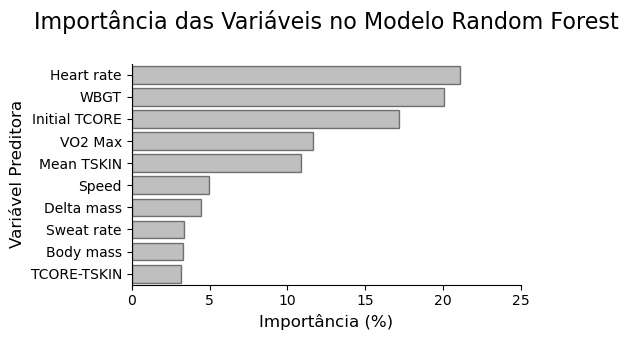

In [42]:
# Plotando o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(5.5, 3.5))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df,edgecolor='black', color='gray',width=0.8,  alpha=0.5, ax=ax)
ax.set_title('Importância das Variáveis no Modelo Random Forest', fontsize=16, pad=25)
ax.set_xlabel('Importância (%)', fontsize=12)
ax.set_ylabel('Variável Preditora', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, 25)
plt.tight_layout()
plt.show()

# **XGBOOST**

## Pré processamento - XGBoost

In [43]:
X3 = df3.drop("EndTCORE_C", axis=1) #separando as variaveis preditoras
y3 = df3["EndTCORE_C"] #separando a variavel predita

In [44]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=42) #separando a base de dados de treino(80%) e teste(20%)

In [45]:
#otmizacao de hiperparametros
param_grid_xgb = { 
    'n_estimators': [90, 100], # numero de arvores 
    'learning_rate': [0.01, 0.02, 0.05], # taxa de aprendizado
    'max_depth': [2, 3, 5], # profundidade maxima de cada arvore
    'subsample': [0.5, 0.6, 0.7], # subamostragem dos dados de treinamento
    'colsample_bytree': [0.4, 0.5], # subamostragem de colunas ao construir cada arvore
    'gamma': [0.3, 0.4, 0.5], # minima reducao de perda para fazer uma particao
    'min_child_weight': [ 6, 7, 8]
}

In [46]:
xgb_regressor_base = xgb.XGBRegressor(random_state=42, eval_metric='rmse') #criacao da instancia do modelo xgboost, utilizando random_state=42 para asegurar reprodutibilidade 

In [47]:
grid_search_xgb = GridSearchCV(estimator=xgb_regressor_base, #algoritmo base
                               param_grid=param_grid_xgb, #hiperparametros
                               cv=5, #5 K-fold (validacao cruzada)
                               scoring='neg_mean_squared_error', # otimiza para o menor MSE
                               n_jobs=-1, # usa todos os nucleos disponiveis
                               verbose=1) # exibe o progresso

## Treinamento do modelo - XGBoost

In [48]:
grid_search_xgb.fit(X_train3, y_train3) #treinando o modelo com base nos dados de treino

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    feature_weights=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=No...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5],
                         'gamma': [0.3, 0.4, 0.5],
                         'learning_rate': [0.01, 0.02, 0.05],
                         'max_depth': [2, 3, 5], 'min_child_weight': [6, 7, 8],
                         'n_estimators': [90, 100],
                         'subsample': [0.5, 0.6, 0.7]},
             scoring='neg_mean_squared_error', verbose=1)

In [49]:
best_params_xgb = grid_search_xgb.best_params_
best_xgb_regressor = grid_search_xgb.best_estimator_

In [50]:
print(best_xgb_regressor)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0.3, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=6, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)


In [51]:
y_pred_xgb_optimized = best_xgb_regressor.predict(X_test3)
y_pred_xgb_train = best_xgb_regressor.predict(X_train3)

## Avaliação do modelo - XGBoost

**Dados de treino**

In [52]:
mse_xgb_train = mean_squared_error(y_train3, y_pred_xgb_train) #calculando MSE
rmse_xgb_train = np.sqrt(mse_xgb_train) #calculando RMSE
r2_xgb_train = r2_score(y_train3, y_pred_xgb_train) #calculando R2

In [53]:
print(f"\n--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TREINO) ---")
print(f"Mean Squared Error (MSE): {mse_xgb_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_train:.2f}")
print(f"R-squared (R²): {r2_xgb_train:.2f}")


--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TREINO) ---
Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.27
R-squared (R²): 0.74


**Dados de teste**

In [54]:
mse_xgb_optimized = mean_squared_error(y_test3, y_pred_xgb_optimized) #calculando 
rmse_xgb_optimized = np.sqrt(mse_xgb_optimized)
r2_xgb_optimized = r2_score(y_test3, y_pred_xgb_optimized)

In [55]:
print(f"\n--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TESTE) ---")
print(f"Mean Squared Error (MSE): {mse_xgb_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_optimized:.2f}")
print(f"R-squared (R²): {r2_xgb_optimized:.2f}")


--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TESTE) ---
Mean Squared Error (MSE): 0.08
Root Mean Squared Error (RMSE): 0.28
R-squared (R²): 0.73


## Gráficos

In [84]:
# Extrair a importância das variáveis do modelo treinado
importances_xgb = (best_xgb_regressor.feature_importances_)*100
feature_names_xgb = X3.columns

In [85]:
# Criar um DataFrame para visualização
xgb_importance_df = pd.DataFrame({
    'Feature': feature_names_xgb,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False).round(2)

In [86]:
xgb_importance_df

,Feature,Importance
5,Mean_TSKIN_C,17.40
8,Heart_rate_bpm,13.76
2,Initial_TCORE_C,11.06
0,WBGT_C,10.79
7,VO2MAX_mLkg1min1,10.19
1,Speed_kmh1,8.21
4,TCORE__TSKIN_C,7.83
6,Sweat_rate_Lh1,7.55
3,Body_mass_kg,7.10
9,Delta_mass_,6.11


In [87]:
xgb_importance_df['Feature'] = xgb_importance_df['Feature'].map(mapa_de_nomes)

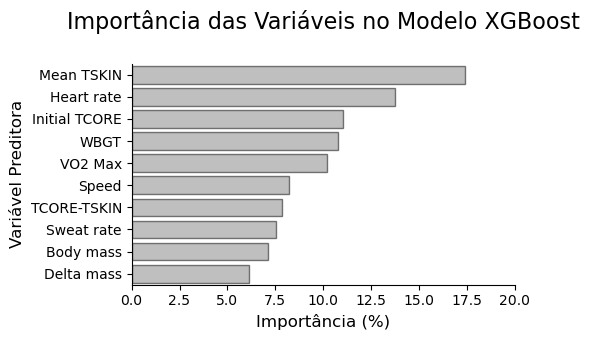

In [91]:
# Plotar o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(5.5, 3.5))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df, edgecolor='black', color='gray',width=0.8,  alpha=0.5, ax=ax)

ax.set_title('Importância das Variáveis no Modelo XGBoost', fontsize=16, pad=25)
ax.set_xlabel('Importância (%)', fontsize=12)
ax.set_ylabel('Variável Preditora', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, 20)
plt.tight_layout()
plt.show()

# **LASSO REFRESSION**

## Pré processamento - LASSO regression

In [61]:
X4 = df4.drop("EndTCORE_C", axis=1) #seprando as variaveis preditoras 
y4 = df4["EndTCORE_C"] #separando a variavel predita

In [62]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.30, random_state=42)#separando a base de dados de treino(80%) e teste(20%)

## Treinamento do modelo - LASSO regression

In [63]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), #padroniza as features
    ('lasso', Lasso(random_state=42, max_iter=2000)) #aplica a Regressão Lasso
])


In [64]:
param_grid_lasso = {
    'lasso__alpha': np.logspace(-4, 2, 7) # Testar de 0.0001 a 100 em escala logarítmica
}

In [65]:
grid_search_lasso = GridSearchCV(estimator=pipeline, #estimador agora e o pipeline
                                 param_grid=param_grid_lasso, #hiperparamentros
                                 cv=5, #5 K-fold (validacao cruzada)
                                 scoring='neg_mean_squared_error', # otimiza para o menor MSE
                                 n_jobs=-1, # Usa todos os nucleos disponiveis
                                 verbose=1) # exibe o progresso

In [66]:
grid_search_lasso.fit(X_train4, y_train4) #treinando o modelo com base nos dados de treino

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso',
                                        Lasso(max_iter=2000,
                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='neg_mean_squared_error', verbose=1)

In [67]:
best_params_lasso = grid_search_lasso.best_params_
best_lasso_regressor_pipeline = grid_search_lasso.best_estimator_

In [68]:
print(best_lasso_regressor_pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.001, max_iter=2000, random_state=42))])


In [69]:
y_pred_lasso_optimized = best_lasso_regressor_pipeline.predict(X_test4)
y_pred_lasso_train = best_lasso_regressor_pipeline.predict(X_train4)

## Avaliação do modelo - LASSO regression

**Dados treino**

In [70]:
mse_lasso_train = mean_squared_error(y_train4, y_pred_lasso_train) #calcula MSE
rmse_lasso_train = np.sqrt(mse_lasso_train) #calcula RMSE
r2_lasso_train = r2_score(y_train4, y_pred_lasso_train) #calcula R2

In [71]:
print(f"\n--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TREINO) ---")
print(f"Mean Squared Error (MSE): {mse_lasso_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_train:.2f}")
print(f"R-squared (R²): {r2_lasso_train:.2f}")


--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TREINO) ---
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
R-squared (R²): 0.88


**Dados teste**

In [72]:
mse_lasso_optimized = mean_squared_error(y_test4, y_pred_lasso_optimized) #calcula MSE
rmse_lasso_optimized = np.sqrt(mse_lasso_optimized) #calcula RMSE
r2_lasso_optimized = r2_score(y_test4, y_pred_lasso_optimized) #calcula R2

In [73]:
print(f"\n--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TESTE) ---")
print(f"Mean Squared Error (MSE): {mse_lasso_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_optimized:.2f}")
print(f"R-squared (R²): {r2_lasso_optimized:.2f}")


--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TESTE) ---
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.23
R-squared (R²): 0.84


## Gráficos

In [112]:
# Extrair os coeficientes do passo 'lasso' dentro do pipeline treinado
coefficients_lasso = best_lasso_regressor_pipeline.named_steps['lasso'].coef_
feature_names_lasso = X4.columns

In [113]:
# Criar um DataFrame para visualização
lasso_coef_df = pd.DataFrame({
    'Feature': feature_names_lasso,
    'Coefficient': coefficients_lasso
}).sort_values(by='Coefficient', key=abs, ascending=False)

In [114]:
# Filtrar apenas coeficientes não nulos (variáveis selecionadas pelo LASSO)
lasso_coef_nonzero_df = lasso_coef_df[lasso_coef_df['Coefficient']!= 0]

In [120]:
lasso_coef_df

,Feature,Coefficient
4,TCORE__TSKIN_C,2.826883
5,Mean_TSKIN_C,2.795176
2,Initial_TCORE_C,-0.250112
8,Heart_rate_bpm,0.117222
7,VO2MAX_mLkg1min1,0.108429
0,WBGT_C,0.055336
9,Delta_mass_,-0.042076
1,Speed_kmh1,0.019273
3,Body_mass_kg,-0.014454
6,Sweat_rate_Lh1,0.008978


In [123]:
lasso_coef_nonzero_df['Feature'] = lasso_coef_nonzero_df['Feature'].map(mapa_de_nomes)

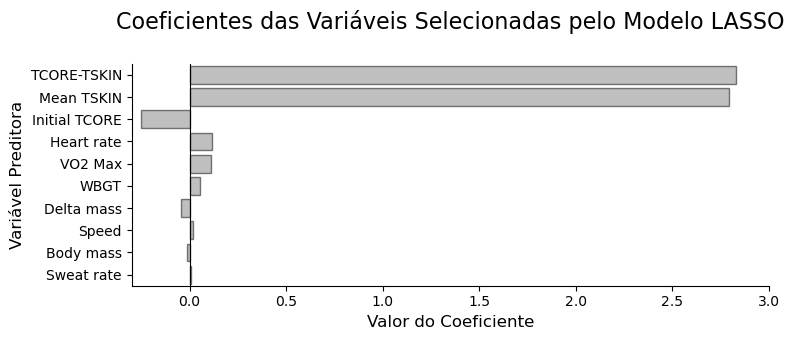

In [129]:
# Plotar o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(8, 3.5))
sns.barplot(x='Coefficient', y='Feature', data=lasso_coef_nonzero_df, edgecolor='black', color='gray',width=0.8,  alpha=0.5, ax=ax)

ax.set_title('Coeficientes das Variáveis Selecionadas pelo Modelo LASSO', fontsize=16, pad=25)
ax.set_xlabel('Valor do Coeficiente', fontsize=12)
ax.set_ylabel('Variável Preditora', fontsize=12)
ax.axvline(0, color='black', linewidth=0.8) # Adiciona uma linha no zero para referência

ax.set_xlim(-0.3, 3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

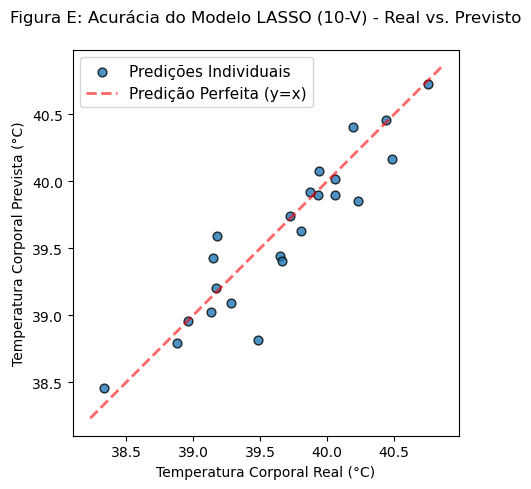

In [132]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(y_test4, y_pred_lasso_optimized, alpha=0.8, edgecolors='k', s=40, label='Predições Individuais')
limites = [
    min(min(y_test4), min(y_pred_lasso_optimized)) - 0.1,
    max(max(y_test4), max(y_pred_lasso_optimized)) + 0.1
]
ax.plot(limites, limites, 'r--', alpha=0.6, lw=2, label='Predição Perfeita (y=x)')
ax.set_title('Figura E: Acurácia do Modelo LASSO (10-V) - Real vs. Previsto', fontsize=12, pad=20)
ax.set_xlabel('Temperatura Corporal Real (°C)', fontsize=10)
ax.set_ylabel('Temperatura Corporal Prevista (°C)', fontsize=10)
ax.legend(fontsize=11)
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

# **Conclusões**

**Decision tree**

O modelo **DecisionTreeRegressor**, configurado com **ccp_alpha=0.02, max_depth=5, min_samples_leaf=3 e min_samples_split=3**, apresentou um desempenho consistente entre os conjuntos de treino e teste. A métrica **R2 de 0.56 (treino)** e **0.55 (teste)** indica uma capacidade preditiva moderada, explicando aproximadamente 55-56% da variância na variável dependente. O RMSE, com valores de **0.34 (treino) e 0.36 (teste)**, sugere que, em média, as previsões do modelo desviam-se em cerca de 0.36 °C do valor real. A consistência entre as métricas de treino e teste é um indicativo positivo de que o modelo possui boa generalização

__________________________________________________________________________________________________________________________________________
**Random forest**

O modelo **RandomForestRegressor** otimizado, configurado com **n_estimators=150, max_depth=3, min_samples_leaf=8, min_samples_split=10, max_features='log2' e ccp_alpha=0.002**, demonstrou um desempenho consistente entre os conjuntos de treino e teste. Com um **R2 de 0.42 (treino) e 0.41 (teste)**, o modelo explica de forma limitada da variância na variável dependente. Os valores de **RMSE de 0.40 (treino) e 0.41 (teste)** indicam que o erro médio de previsão é de aproximadamente 0.41°C da variável de saída.
___________________________________________________________________________________________________________________________
**XGBoost**

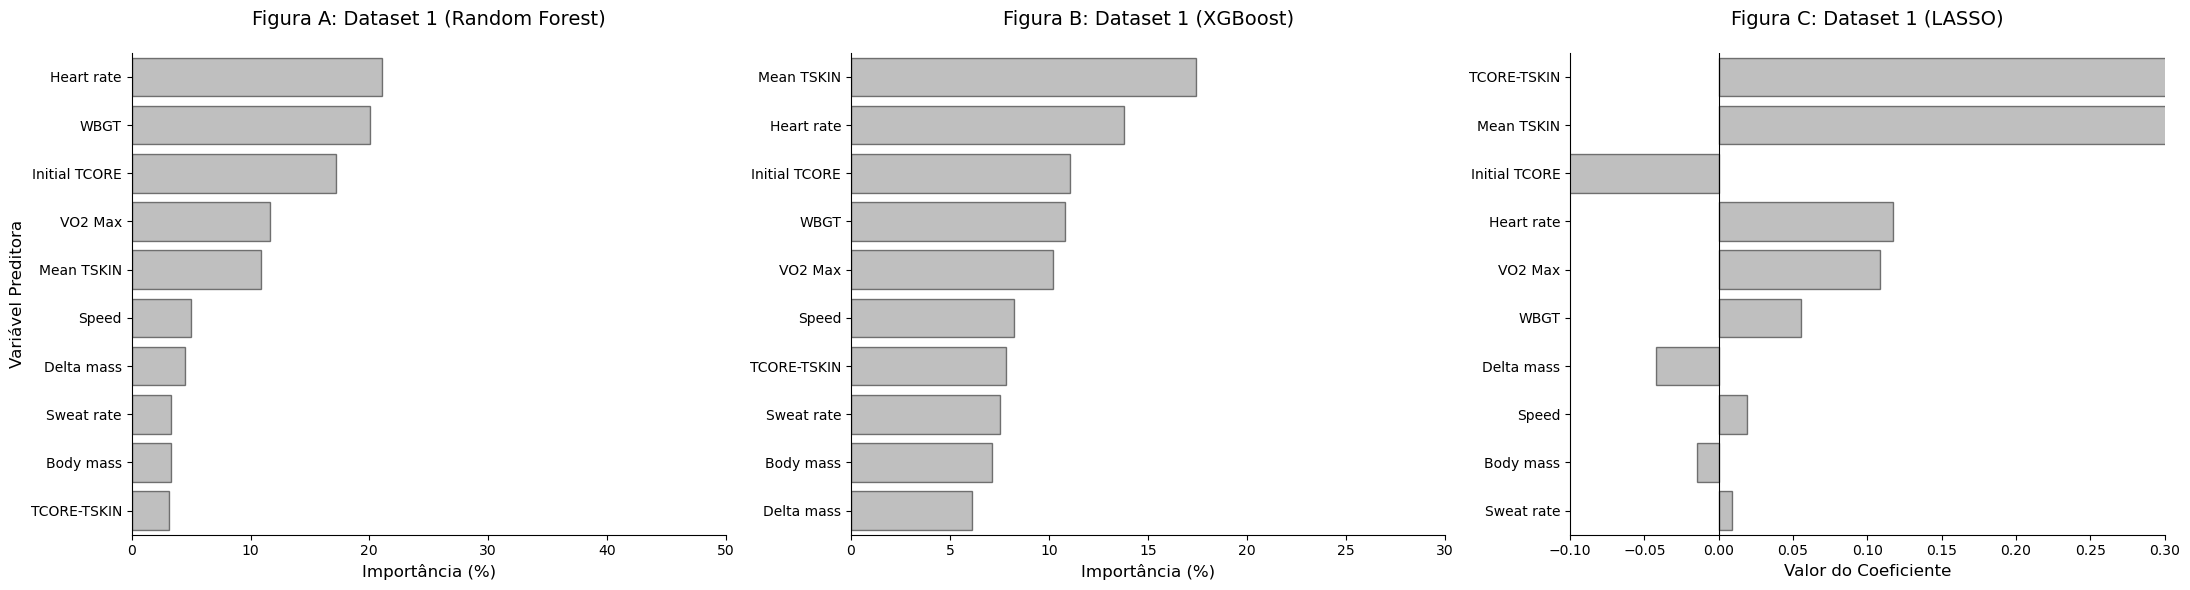

In [138]:
# Mapeamento de nomes (definido uma vez para ser usado em todos os gráficos)
mapa_de_nomes = {
    'Heart_rate_bpm': 'Heart rate',
    'WBGT_C': 'WBGT',
    'Initial_TCORE_C': 'Initial TCORE',
    'VO2MAX_mLkg1min1': 'VO2 Max',
    'Mean_TSKIN_C': 'Mean TSKIN',
    'Speed_kmh1': 'Speed',
    'Delta_mass_': 'Delta mass',
    'Sweat_rate_Lh1': 'Sweat rate',
    'Body_mass_kg': 'Body mass',
    'TCORE__TSKIN_C': 'TCORE-TSKIN'
}

# Dados para o Gráfico A (Random Forest)
importances_rf = (best_rf_regressor.feature_importances_) * 100
feature_names_rf = X2.columns
rf_importance_df = pd.DataFrame({
    'Feature': feature_names_rf,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)
rf_importance_df['Feature'] = rf_importance_df['Feature'].map(mapa_de_nomes)

# Dados para o Gráfico B (XGBoost)
importances_xgb = (best_xgb_regressor.feature_importances_) * 100
feature_names_xgb = X3.columns
xgb_importance_df = pd.DataFrame({
    'Feature': feature_names_xgb,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False).round(2)
xgb_importance_df['Feature'] = xgb_importance_df['Feature'].map(mapa_de_nomes)

# Dados para o Gráfico C (LASSO)
coefficients_lasso = best_lasso_regressor_pipeline.named_steps['lasso'].coef_
feature_names_lasso = X4.columns
lasso_coef_df = pd.DataFrame({
    'Feature': feature_names_lasso,
    'Coefficient': coefficients_lasso
}).sort_values(by='Coefficient', key=abs, ascending=False)
lasso_coef_nonzero_df = lasso_coef_df[lasso_coef_df['Coefficient'] != 0]
lasso_coef_nonzero_df['Feature'] = lasso_coef_nonzero_df['Feature'].map(mapa_de_nomes)


# --- 2. CRIAÇÃO DO PAINEL COM 3 GRÁFICOS (SUBPLOTS) ---

# Cria uma figura e uma grade de subplots com 1 linha e 3 colunas.
# `figsize` é ajustado para acomodar os três gráficos lado a lado.
# `axes` será um array com os três eixos: axes[0], axes[1] e axes[2].
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# --- Gráfico A: Random Forest ---
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, edgecolor='black', color='gray', width=0.8, alpha=0.5, ax=axes[0])
axes[0].set_title('Figura A: Dataset 1 (Random Forest)', fontsize=14, pad=20)
axes[0].set_xlabel('Importância (%)', fontsize=12)
axes[0].set_ylabel('Variável Preditora', fontsize=12)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_xlim(0, 50)

# --- Gráfico B: XGBoost ---
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df, edgecolor='black', color='gray', width=0.8, alpha=0.5, ax=axes[1])
axes[1].set_title('Figura B: Dataset 1 (XGBoost)', fontsize=14, pad=20)
axes[1].set_xlabel('Importância (%)', fontsize=12)
axes[1].set_ylabel('') # Remove o rótulo Y para um visual mais limpo
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_xlim(0, 30)

# --- Gráfico C: LASSO ---
sns.barplot(x='Coefficient', y='Feature', data=lasso_coef_nonzero_df, edgecolor='black', color='gray', width=0.8, alpha=0.5, ax=axes[2])
axes[2].set_title('Figura C: Dataset 1 (LASSO)', fontsize=14, pad=20)
axes[2].set_xlabel('Valor do Coeficiente', fontsize=12)
axes[2].set_ylabel('') # Remove o rótulo Y para um visual mais limpo
axes[2].axvline(0, color='black', linewidth=0.8)
axes[2].set_xlim(-0.1, 0.3)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)


# --- 3. FINALIZAÇÃO E EXIBIÇÃO ---

# Ajusta o layout para evitar sobreposição de títulos e rótulos
plt.tight_layout()

# Salva a figura inteira contendo os três gráficos
#plt.savefig('graficos_dataset1_modelos_comparativo1.png', dpi=300, bbox_inches='tight')

# Mostra o resultado final
plt.show()